# Визуализация и результаты

#### Определение путей к директориям c кадрами и оптическими потоками, импорт библиотек.
- **orig_resize_folder** - Оригинальные кадры. 
- **reconstr_folder** - Реконструкции кадров (после применения mbt2018-mean).
- **opt_flow_between_orig** - Оптические потоки между оригинальными кадрами.
- **pt_flow_between_reconstr** - Оптические потоки между реконструированными кадрами.
- **opt_flow_reconstr_orig** - Реконструкции оптических потоков между оригинальными кадрами (после применения модели mbt2018-mean).
- **opt_flow_reconstr_reconstr** - Реконструкции оптических потоков между реконструированными кадрами (после применения модели mbt2018-mean).



In [1]:
orig_folder = 'images\\demo-frames'
orig_resize_folder = 'images\\orig_resize_frames'
reconstr_folder = 'images\\reconstr_frames'
opt_flow_between_orig = 'opt_flow\\between_orig'
opt_flow_between_reconstr = 'opt_flow\\between_reconstr'
opt_flow_reconstr_orig = 'opt_flow\\reconstr_b-n_orig'
opt_flow_reconstr_reconstr = 'opt_flow\\reconstr_b-n_reconstr'

In [2]:
import os
from PIL import Image
from torchvision import transforms
from torchvision.transforms import ToTensor, ToPILImage
import torch
import matplotlib.pyplot as plt
import math

### Вспомогательные функции.

In [3]:
def compute_BPP(H, W, Lenght_stream):
    return ( 8.0 * Lenght_stream / (H * W) )

def compute_bpp_for_folder(input_folder):
    list_OF_BPP = []
    for filename in sorted(os.listdir(input_folder)):
        file_path = os.path.join(input_folder, filename)
        file_size = os.path.getsize(file_path)
        #print(file_size)
        list_OF_BPP.append(compute_BPP(512, 1024, file_size))
    return list_OF_BPP

In [4]:
# def MSE(a, b):
#     return torch.mean((a - b)**2).item()

# def PSNR(a, b):
#     return -10 * math.log10(MSE(a,b))

In [5]:
#MSE для картинок
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import os
from PIL import Image
from torchvision.transforms import ToTensor
import torch

def compute_mse(input_folder_1, input_folder_2):
    mse_values = []         
    files_folder_1 = sorted(os.listdir(input_folder_1))
    #print(sorted(os.listdir(input_folder_1)))
    files_folder_2 = sorted(os.listdir(input_folder_2))
    #print(sorted(os.listdir(input_folder_2)))
    
    for filename1, filename2 in zip(files_folder_1, files_folder_2):
        file_path_1 = os.path.join(input_folder_1, filename1)
        file_path_2 = os.path.join(input_folder_2, filename2)
        
        image1 = Image.open(file_path_1).convert('RGB')
        image2 = Image.open(file_path_2).convert('RGB')
        
        tensor1 = ToTensor()(image1)
        tensor2 = ToTensor()(image2)
        
        mse = torch.mean((tensor1 - tensor2) ** 2).item()
        mse_values.append(mse)
        #print(f'MSE between {filename1} and {filename2}: {mse:.5f}')

    return mse_values



## Сравнение кадров до и после сжатия

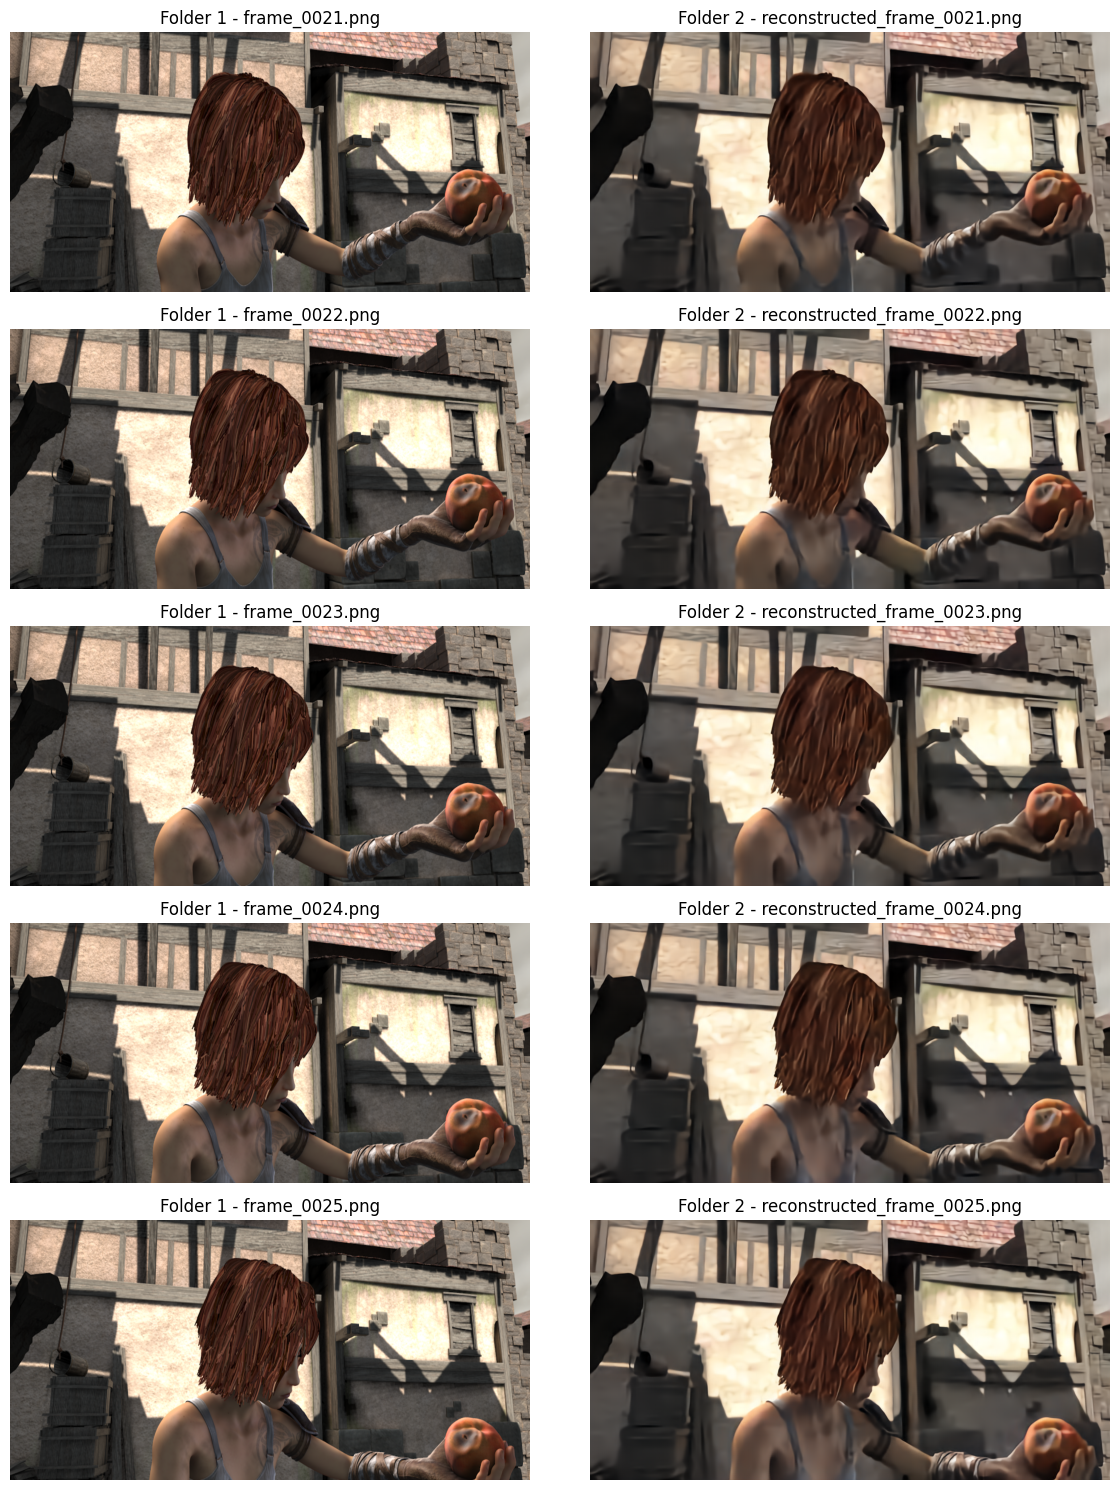

In [6]:
images1 = sorted(os.listdir(orig_resize_folder))
images2 = sorted(os.listdir(reconstr_folder))

fig, axs = plt.subplots(nrows=len(images1), ncols=2, figsize=(12, 3 * len(images1)))

for i, (img1, img2) in enumerate(zip(images1, images2)):

    image_path1 = os.path.join(orig_resize_folder, img1)
    image_path2 = os.path.join(reconstr_folder, img2)
    image1 = Image.open(image_path1)
    image2 = Image.open(image_path2)
    

    axs[i, 0].imshow(image1)
    axs[i, 0].set_title('Folder 1 - ' + img1)
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(image2)
    axs[i, 1].set_title('Folder 2 - ' + img2)
    axs[i, 1].axis('off')  
plt.tight_layout()
plt.show()

## Визуализация оптических потоков

### Виузализация оптических потоков между оригинальными кадрами (столбец 1) и между сжатыми кадрами (столбец 2)

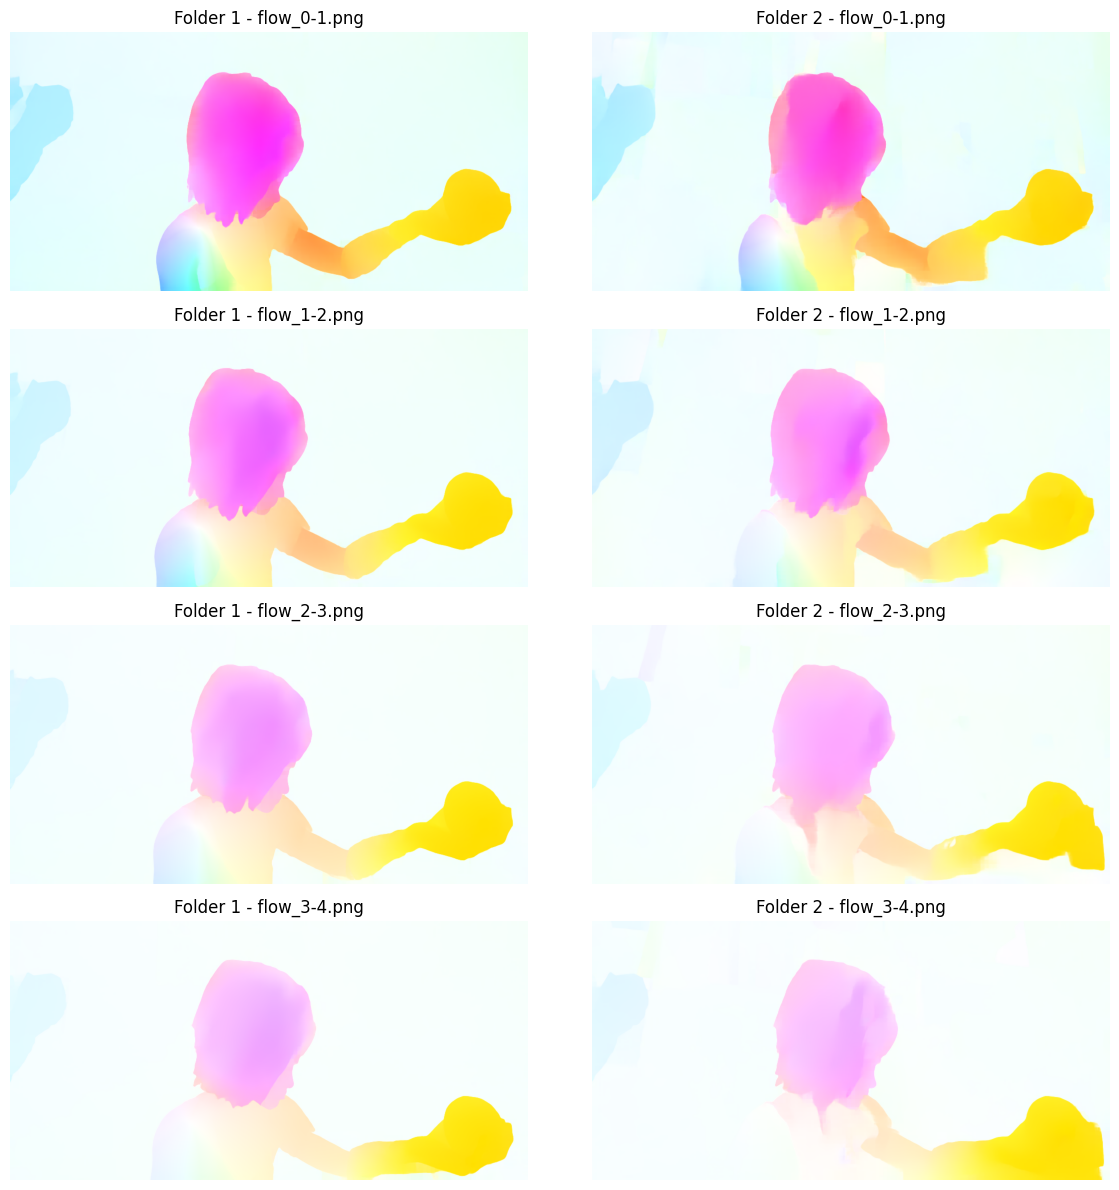

In [7]:
images1 = sorted(os.listdir(opt_flow_between_orig))
images2 = sorted(os.listdir(opt_flow_between_reconstr))

fig, axs = plt.subplots(nrows=len(images1), ncols=2, figsize=(12, 3 * len(images1)))

for i, (img1, img2) in enumerate(zip(images1, images2)):

    image_path1 = os.path.join(opt_flow_between_orig, img1)
    image_path2 = os.path.join(opt_flow_between_reconstr, img2)
    image1 = Image.open(image_path1)
    image2 = Image.open(image_path2)
    
    axs[i, 0].imshow(image1)
    axs[i, 0].set_title('Folder 1 - ' + img1)
    axs[i, 0].axis('off')  
    
    axs[i, 1].imshow(image2)
    axs[i, 1].set_title('Folder 2 - ' + img2)
    axs[i, 1].axis('off') 

plt.tight_layout()
plt.show()

### Визуализация оптических потоков между оригиналными кадрами (столбец 1) и оптических потоков между сжатыми кадрами (столбец 2) после сжатия

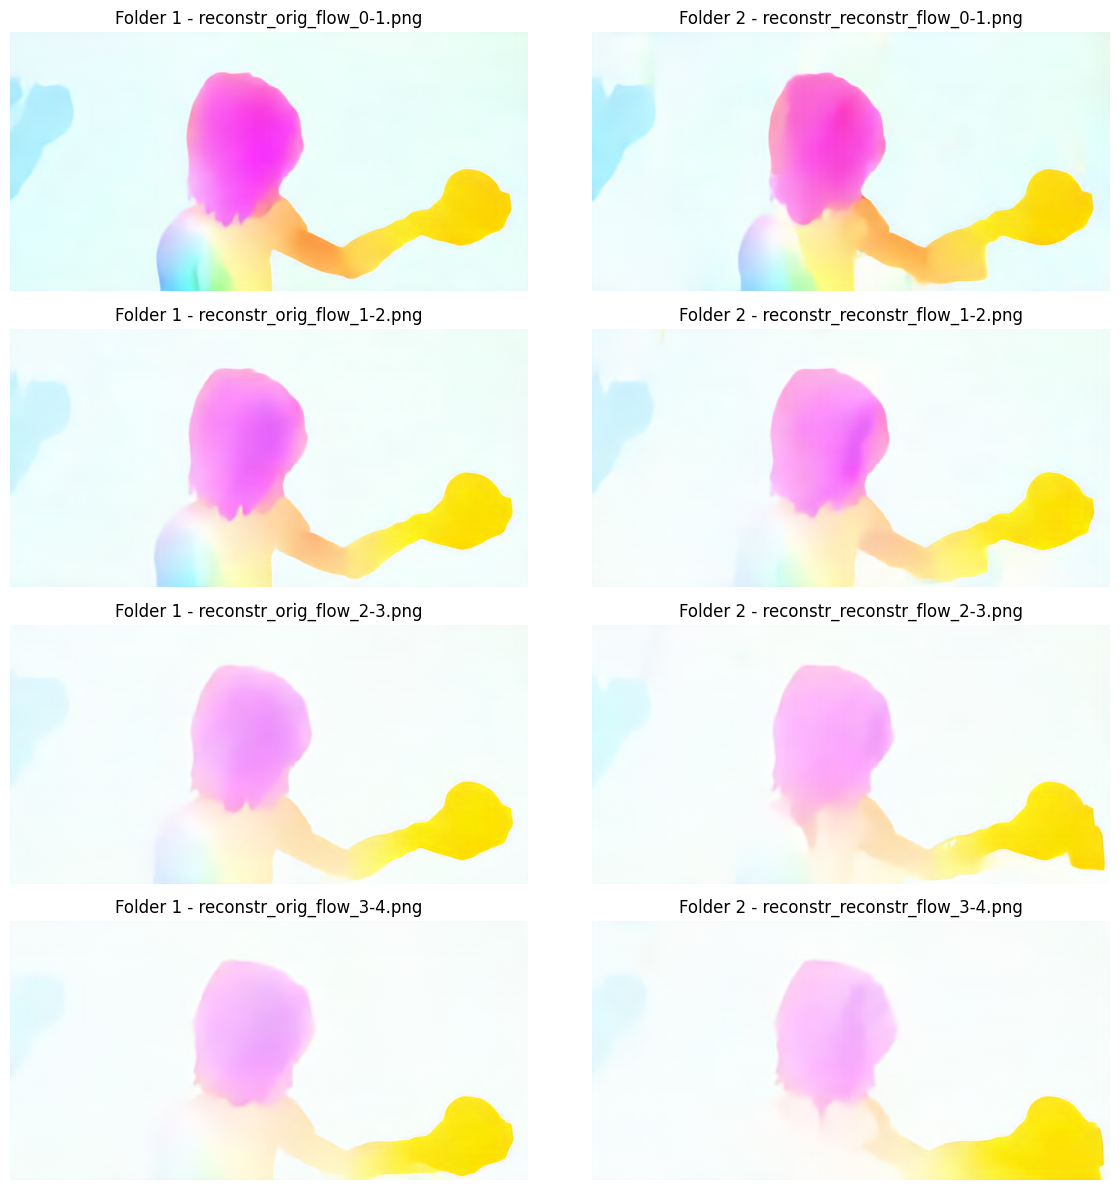

In [8]:
images1 = sorted(os.listdir(opt_flow_reconstr_orig))
images2 = sorted(os.listdir(opt_flow_reconstr_reconstr))

fig, axs = plt.subplots(nrows=len(images1), ncols=2, figsize=(12, 3 * len(images1)))

for i, (img1, img2) in enumerate(zip(images1, images2)):

    image_path1 = os.path.join(opt_flow_reconstr_orig, img1)
    image_path2 = os.path.join(opt_flow_reconstr_reconstr, img2)
    image1 = Image.open(image_path1)
    image2 = Image.open(image_path2)
    
    axs[i, 0].imshow(image1)
    axs[i, 0].set_title('Folder 1 - ' + img1)
    axs[i, 0].axis('off') 
    
    axs[i, 1].imshow(image2)
    axs[i, 1].set_title('Folder 2 - ' + img2)
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

## Метрики

### MSE между оригинальными кадрами и сжатыми


In [43]:
import pandas as pd
table = pd.DataFrame(compute_mse(orig_resize_folder, reconstr_folder), 
                     columns=["MSE (orig frames, reconstr frames)"])
#print('MSE (OptFlow between original frames, reconstructed OptFlow between original frames) = ', compute_mse(opt_flow_between_orig, opt_flow_reconstr_orig))
table

MSE (orig frames, reconstr frames)
0                            0.001085
1                            0.001087
2                            0.001090
3                            0.001102
4                            0.001115

### BPP для оригинальных и сжатых кадров 

In [38]:
table = pd.DataFrame(compute_bpp_for_folder(orig_resize_folder), 
                     columns=["BPP for orginal frames(0,1,2,3,4)"])
table["BPP for reconstr frames(0,1,2,3,4)"] = compute_bpp_for_folder(reconstr_folder)
table

BPP for orginal frames(0,1,2,3,4)  BPP for reconstr frames(0,1,2,3,4)
0                          11.184219                            8.068329
1                          11.212921                            8.109863
2                          11.224426                            8.140411
3                          11.236176                            8.152237
4                          11.241180                            8.138535

### MSE между оригинальными оптическими потоками оригинальных кадров и сжатыми оптическими потоками сжатых кадров 

In [42]:
table = pd.DataFrame(compute_mse(opt_flow_between_orig, opt_flow_reconstr_reconstr), 
                     columns=["MSE (OptFlow between original frames, reconstructed OptFlow between original frames)"])
table

MSE (OptFlow between original frames, reconstructed OptFlow between original frames)
0                                           0.002260                                   
1                                           0.001210                                   
2                                           0.002944                                   
3                                           0.003632

### BPP для оптических потоков

In [44]:
table = pd.DataFrame(compute_bpp_for_folder(opt_flow_between_orig), 
                     columns=["BPP for OF between original frames(0-1, 1-2, 2-3, 3-4)"])
#table["BPP for reconstr frames(0,1,2,3,4)"] = compute_bpp_for_folder(reconstr_folder)
table['BPP for OF between reconstructed frames(0-1, 1-2, 2-3, 3-4)'] = compute_bpp_for_folder(opt_flow_between_reconstr)
table['BPP for OF between original frames after mbt2018-mean(0-1, 1-2, 2-3, 3-4)'] = compute_bpp_for_folder(opt_flow_reconstr_orig)
table['BPP for OF between reconstructed frames after mbt2018-mean:(0-1, 1-2, 2-3, 3-4)'] = compute_bpp_for_folder(opt_flow_reconstr_reconstr)
table

BPP for OF between original frames(0-1, 1-2, 2-3, 3-4)  \
0                                           2.708679        
1                                           2.200150        
2                                           1.806686        
3                                           1.668549        

   BPP for OF between reconstructed frames(0-1, 1-2, 2-3, 3-4)  \
0                                           3.315063             
1                                           2.511978             
2                                           2.082550             
3                                           1.855530             

   BPP for OF between original frames after mbt2018-mean(0-1, 1-2, 2-3, 3-4)  \
0                                           5.848770                           
1                                           5.599808                           
2                                           5.360809                           
3                                           5.180923                           

   BPP for OF between reconstructed frames after mbt2018-mean:(0-1, 1-2, 2-3, 3-4)  
0                                           5.857468                                
1                                           5.556778                                
2                                           5.341660                                
3                                           5.115585

Можно заметить, что после использования mbt.2018-mean размер изображений в байтах и, соответственно, BPP становится меньше, в то время как MSE между ними достаточно невелико и позволяет удостовериться в том, что изображения действительно схожи и серьезных потерей в качестве мы не увидим. Однако для оптического потока результаты (BPP) на текущий момент нельзя назвать удовлетворительными